# Weak Mixed k-Metric Dimensions
Za začetek napišimo CLP program, ki bo vrnil $wmdim_k(G)$ in pripadajoč "resolving set" $S$. Pred tem pa definirajmo še razdaljo med vozlišči in povezavami.

In [1]:
# nalozimo potrebne knjiznice
from sage.all import *
from sage.graphs.graph_generators import graphs
from sage.graphs.graph import Graph
from sage.numerical.mip import MixedIntegerLinearProgram

In [2]:
def razdalja(moznost, vozlisce, G):
    c, a = moznost
    if c == 'e':
        U, V = a
        return min(G.distance(U, vozlisce), G.distance(V, vozlisce))
    else:
        return G.distance(a, vozlisce)

In [3]:
def CLP_weak_k_dim(G, k):
    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)

    V = G.vertices()
    E = G.edges(labels=False)

    moznosti = [('v', v) for v in V] + [('e', e) for e in E]

    p.set_objective(sum(x[v] for v in V))
    
    for a, b in Combinations(moznosti, 2):
        p.add_constraint(
            sum(abs(razdalja(a, v, G) - razdalja(b, v, G)) * x[v] for v in V) >= k
            )

    wmdim_k = p.solve()
    mnozica_S = [v for v in V if p.get_values(x[v]) > 0.5]

    return (wmdim_k, mnozica_S)

Sedaj definirajmo še funkcijo $\kappa''(G)$, ki je po definiciji največja vrednost $k$ za katero je $wmdim_k(G)$ še definirana.

In [4]:
def kappa_2_crti(G):
    k = 1
    while True:
        try:
            CLP_weak_k_dim(G, k)
            k += 1
        except:
            return k - 1

# CIKLI

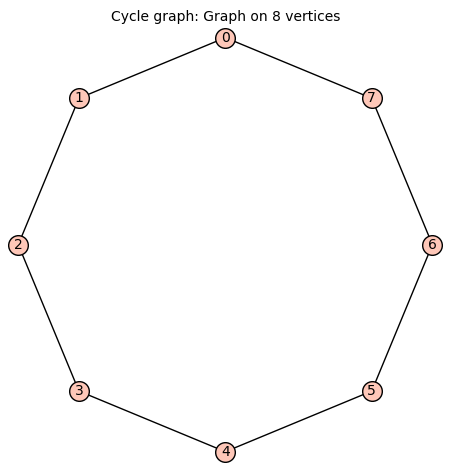

In [15]:
graphs.CycleGraph(8)

In [8]:
def cikli_do_n(n):
    for i in range(3, n + 1):
        G = graphs.CycleGraph(i) 
        kappa_2crti = kappa_2_crti(G)
        print(f"- velikost: {i} : kappa = {kappa_2crti}")
        for k in range(1, kappa_2crti + 1):
            wmdim,_ = CLP_weak_k_dim(G, k)
            print(f"  k = {k}, wmdim = {wmdim}")

In [9]:
cikli_do_n(10)

- velikost: 3 : kappa = 1
  k = 1, wmdim = 3.0
- velikost: 4 : kappa = 2
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
- velikost: 5 : kappa = 2
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
- velikost: 6 : kappa = 3
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
- velikost: 7 : kappa = 3
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
- velikost: 8 : kappa = 4
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
- velikost: 9 : kappa = 4
  k = 1, wmdim = 3.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 9.0
- velikost: 10 : kappa = 5
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 6.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 10.0


Glede na dani vzorec sklepam, da je $$\kappa''(G)= \Big\lfloor \frac{n}{2} \Big\rfloor.$$ 

Za $wmdim_k(G)$ pa lahko opazimo naslednjo formulo: $$wmdim_1(G) = 3,$$
$$wmdim_k(G) = \begin{cases}
2k, &\text{če} \ n \ \text{sod}\
2k + 1, &\text{če} \ n \ \text{lih}
\end{cases}$$

# HIPERKOCKE

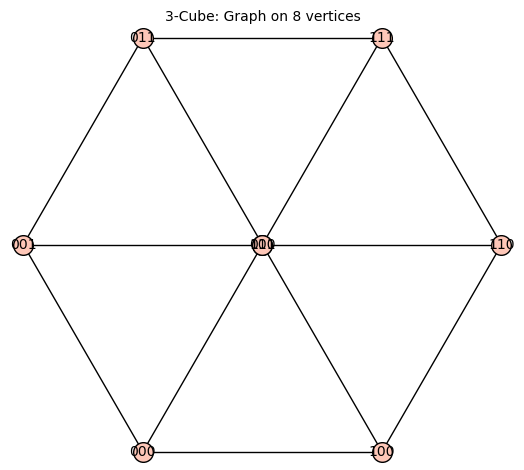

In [14]:
graphs.CubeGraph(3)

In [10]:
def hiperkocke_do_n(n):
    for i in range(1, n + 1):
        G = graphs.CubeGraph(i)
        kappa_2crti = kappa_2_crti(G)
        print(f"- velikost: {i} : kappa = {kappa_2crti}")
        for k in range(kappa_2crti + 1):
            wmdim,_  = CLP_weak_k_dim(G, k)
            print(f"  k = {k}, wmdim = {wmdim}")

In [11]:
hiperkocke_do_n(4)

- velikost: 1 : kappa = 1
  k = 0, wmdim = 0.0
  k = 1, wmdim = 2.0
- velikost: 2 : kappa = 2
  k = 0, wmdim = 0.0
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
- velikost: 3 : kappa = 4
  k = 0, wmdim = 0.0
  k = 1, wmdim = 3.0
  k = 2, wmdim = 4.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
- velikost: 4 : kappa = 8
  k = 0, wmdim = 0.0
  k = 1, wmdim = 4.0
  k = 2, wmdim = 5.0
  k = 3, wmdim = 7.0
  k = 4, wmdim = 8.0
  k = 5, wmdim = 11.0
  k = 6, wmdim = 14.0
  k = 7, wmdim = 15.0
  k = 8, wmdim = 16.0


Na podlagi rezultatov za prvih nekaj $n$ lahko sklepamo, da je $\kappa''(G) = 2^{n-1}$. Za $wmdim_k(G)$ zaenkrat težko sklepam.

# POLNI GRAFI

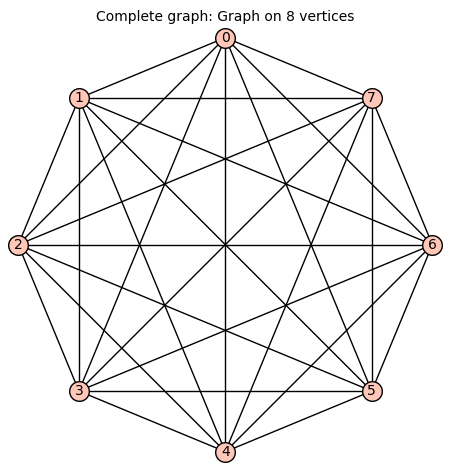

In [16]:
graphs.CompleteGraph(8)

In [5]:
def compute_wmdims_for_complete_graphs(sizes):
    
    results = {}
    
    for n in sizes:
        G = graphs.CompleteGraph(n)
        results[n] = {}
        print(f"\nProcessing CompleteGraph with n={n}")
        
        max_k = kappa_2_crti(G)
        print(f"  Max k (kappa'') = {max_k}")
        
        for k in range(1, max_k + 1):
            try:
                dimension, optimal_set = CLP_weak_k_dim(G, k)
                results[n][k] = (dimension, optimal_set)
                print(f"    k={k}: wmdim_k(K_{n}) = {dimension}, S = {optimal_set}")
            except ValueError:
                print(f"    k={k}: Infeasible (choose smaller k)")
                results[n][k] = None
                break  
            
    return results

In [6]:
sizes = [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]
results = compute_wmdims_for_complete_graphs(sizes)


Processing CompleteGraph with n=3
  Max k (kappa'') = 1
    k=1: wmdim_k(K_3) = 3.0, S = [0, 1, 2]

Processing CompleteGraph with n=4
  Max k (kappa'') = 1
    k=1: wmdim_k(K_4) = 4.0, S = [0, 1, 2, 3]

Processing CompleteGraph with n=5
  Max k (kappa'') = 1
    k=1: wmdim_k(K_5) = 5.0, S = [0, 1, 2, 3, 4]

Processing CompleteGraph with n=6
  Max k (kappa'') = 1
    k=1: wmdim_k(K_6) = 6.0, S = [0, 1, 2, 3, 4, 5]

Processing CompleteGraph with n=7
  Max k (kappa'') = 1
    k=1: wmdim_k(K_7) = 7.0, S = [0, 1, 2, 3, 4, 5, 6]

Processing CompleteGraph with n=8
  Max k (kappa'') = 1
    k=1: wmdim_k(K_8) = 8.0, S = [0, 1, 2, 3, 4, 5, 6, 7]

Processing CompleteGraph with n=9
  Max k (kappa'') = 1
    k=1: wmdim_k(K_9) = 9.0, S = [0, 1, 2, 3, 4, 5, 6, 7, 8]

Processing CompleteGraph with n=10
  Max k (kappa'') = 1
    k=1: wmdim_k(K_10) = 10.0, S = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Processing CompleteGraph with n=20
  Max k (kappa'') = 1
    k=1: wmdim_k(K_20) = 20.0, S = [0, 1, 2, 3, 4, 5, 6

Za polne grafe je $\kappa''(G) = 1$, za $k = 1$ je $wmdim_k(G) = n$, kjer je $n$ enako številu vozlišč.

# DVODELNI POLNI GRAFI

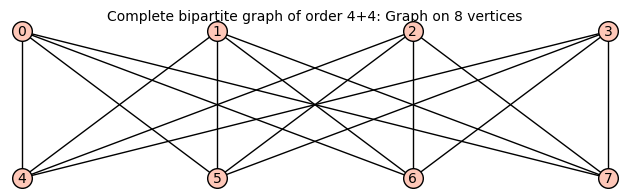

In [6]:
graphs.CompleteBipartiteGraph(4,4)

In [7]:
# Max_k, wmdim_k, S za dvodelne polne grafe.

def compute_wmdims_for_complete_bipartite_graphs(sizes):
    
    results = {}
    
    for m, n in sizes:
        G = graphs.CompleteBipartiteGraph(m, n)
        results[(m, n)] = {}
        print(f"\nProcessing CompleteBipartiteGraph with m={m}, n={n}")
        
        max_k = kappa_2_crti(G)
        print(f"  Max k (kappa'') = {max_k}")
        
        for k in range(1, max_k + 1):
            try:
                dimension, optimal_set = CLP_weak_k_dim(G, k)
                results[(m, n)][k] = (dimension, optimal_set)
                print(f"    k={k}: wmdim_k(K_{{{m},{n}}}) = {dimension}, S = {optimal_set}")
            except ValueError:
                print(f"    k={k}: Infeasible (choose smaller k)")
                results[(m, n)][k] = None
                break  
    
    return results

In [ ]:
sizes = [(1,2), (2,2), (1,3), (2,3), (3,3), (1,4), (2,4), (3,4), (4,4), (1,5), (2,5), (3,5), (4,5), (5,5), (1,6), (2,6), (3,6), (4,6), (5,6), (6,6), (1,7), (2,7), (3,7), (4,7), (5,7), (6,7), (7,7), (1,8), (2,8), (3,8), (4,8), (5,8), (6,8), (7,8), (8,8), (1,9), (2,9), (3,9), (4,9), (5,9), (6,9), (7,9), (8,9), (9,9), (1,10), (2,10), (3,10), (4,10), (5,10), (6,10), (7,10), (8,10), (9,10), (10,10)]
results = compute_wmdims_for_complete_bipartite_graphs(sizes)

Za dvodelne polne grafe za katere je $m$ ali $n$ enak $1$, je $\kappa''(G) = 1$, $wmdim_k(G)$ je tedaj enak $m \cdot n$, izjema je dvodelni polni graf, kjer sta $m$ in $n$ enaka 1, tedaj je $\kappa''(G) = 1$, $wmdim_k(G)$ pa je enak $2$, torej je enak $m + n$. Za dvodelne polne grafe, za katere $m$ in $n$ nista enaka $1$, je $\kappa''(G) = 2$. $wmdim_k(G)$ je za $k = 1$ enak $m + n - 1$, če je $m$ ali $n$ enak $2$, v nasprotnem primeru pa je enak $m + n - 2$. Za $k = 2$, je $wmdim_k(G)$ enak $m + n$.

# KARTEZIČNI PRODUKTI CIKLOV

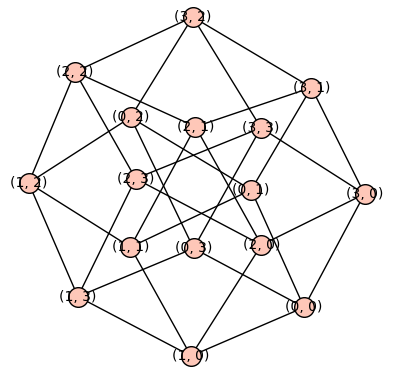

In [8]:
C1 = graphs.CycleGraph(4)
C2 = graphs.CycleGraph(4)

cartesian_product = C1.cartesian_product(C2)

cartesian_product.show()

In [ ]:
# Max_k, wmdim_k, S za kartezične produkte cikov.

def compute_wmdims_for_cartesian_product_of_cycles(sizes):
    
    results = {}

    for m, n in sizes:
        C1 = graphs.CycleGraph(m)
        C2 = graphs.CycleGraph(n)
        G = C1.cartesian_product(C2)
        
        results[(m, n)] = {}
        print(f"\nProcessing Cartesian Product of Cycles C_{m} x C_{n}")
        
        max_k = kappa_2_crti(G)  
        print(f"  Max k (kappa'') = {max_k}")
        
        for k in range(1, max_k + 1):
            try:
                dimension, optimal_set = CLP_weak_k_dim(G, k)  
                results[(m, n)][k] = (dimension, optimal_set)
                print(f"    k={k}: wmdim_k(C_{m} x C_{n}) = {dimension}, S = {optimal_set}")
            except ValueError:
                print(f"    k={k}: Infeasible (choose smaller k)")
                results[(m, n)][k] = None
                break

    return results

In [ ]:
sizes = [(1,2), (2,2), (1,3), (2,3), (3,3), (1,4), (2,4), (3,4), (4,4), (1,5), (2,5), (3,5), (4,5), (5,5), (1,6), (2,6), (3,6), (4,6), (5,6), (6,6)]
results = compute_wmdims_for_cartesian_product_of_cycles(sizes)

Pri kartezičnih produktih ciklov, je za grafe s $k$-jem enakim $\kappa(G)$, $wmdim_k(G)$ enak $m \cdot n$. 